In [1]:
%load_ext autoreload
%autoreload 2

# Import Libraries

In [2]:
import numpy as np
from scipy.io import loadmat

from utils import get_vocab_list, get_vocab_list2, process_email, email_features
from svm import SVM, linear_kernel, polynomial_kernel, gaussian_kernel

# Email Preprocessing

In [3]:
file_contents = open("data/emailSample1.txt").read()
vocab_list = get_vocab_list('data/vocab.txt')
word_indices = process_email(file_contents, vocab_list)

# Feature Extraction

In [4]:
n = len(vocab_list)
features = email_features(word_indices, n)

In [5]:
features.shape

(1899, 1)

In [6]:
print(f"Length of feature vector: {features.size}")
print(f"Number of non-zero entries: {sum(features > 0)}")

Length of feature vector: 1899
Number of non-zero entries: [45]


# Train Linear SVM for Spam Classification

In [7]:
# Load the Spam Email dataset
data = loadmat("data/spamTrain.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [8]:
X, y = data['X'], data['y']
C = 0.1

In [9]:
model = SVM()

In [10]:
model.svmTrain(X, y)

Pre-computing the kernel matrix
Training...
This may take 1 to 2 minutes
Elapsed time: 334.8648 seconds


In [11]:
y_predicted = model.svmPredict(X)

In [12]:
print(f"Training Accuracy: {np.mean(y_predicted==y) *100}")

Training Accuracy: 96.475


# Test Spam Classification

In [13]:
Test_data = loadmat('data/spamTest.mat')
Test_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])

In [14]:
Xtest, ytest = Test_data['Xtest'], Test_data['ytest']

In [15]:
p_ytest = model.svmPredict(Xtest)

In [16]:
print(f"Training Accuracy: {np.mean(p_ytest==ytest) *100}")

Training Accuracy: 94.39999999999999


In [17]:
model.model.get('w').shape

(1899, 1)

# Predict using other email

In [18]:
filename = "data/myspamemail.txt"
file_contents = open(filename).read().strip()
word_indices = process_email(file_contents, vocab_list)
x = email_features(word_indices, n)
p = model.svmPredict(x)

In [19]:
print(f"\nProcessed {filename}\n\nSpam Classification: {p[0][0]}")
print("\n(1 indicates spam, 0 indicates not spam)")


Processed data/myspamemail.txt

Spam Classification: 1.0

(1 indicates spam, 0 indicates not spam)


# Top Predictors of Spam

In [20]:
# Get and sort the weights
W = model.model.get('w')

In [21]:
W_sorted = np.sort(W, axis=0)
weight = W_sorted[::-1].flatten().tolist()
W_idx = np.argsort(W, axis=0)
idx = W_idx[::-1].flatten().tolist()

In [22]:
weight[:5]

[2.7035183042551143,
 2.376440807775023,
 2.099522784978463,
 2.0483362651220083,
 2.0434920597098754]

In [23]:
idx[:5]

[1397, 1860, 1008, 1851, 529]

In [24]:
vocab_dict = get_vocab_list2("data/vocab.txt")

In [25]:
print("Top predictors of spam: ")
for i in range(15):
    index = idx[i]+1
    print(f"{vocab_dict[index]}, {weight[i]}")

Top predictors of spam: 
remov, 2.7035183042551143
within, 2.376440807775023
market, 2.099522784978463
will, 2.0483362651220083
email, 2.0434920597098754
inform, 2.035898930776365
your, 2.0007277845692273
pleas, 1.9378162761278548
per, 1.9157006256979905
hour, 1.896653337728277
our, 1.8933925661828364
am, 1.8932732885695733
monei, 1.881038173767701
offer, 1.8578912613218643
guarante, 1.8533784527444772


# Choosing C and sigma for RBF (Gaussian) Kernel

In [35]:
from utils import parameter_search, plot_data
import matplotlib.pyplot as plt

In [36]:
data1 = loadmat('data/ex6data1.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [37]:
X = data1['X']
print(X.shape)
y = data1['y']
print(y.shape)

(51, 2)
(51, 1)


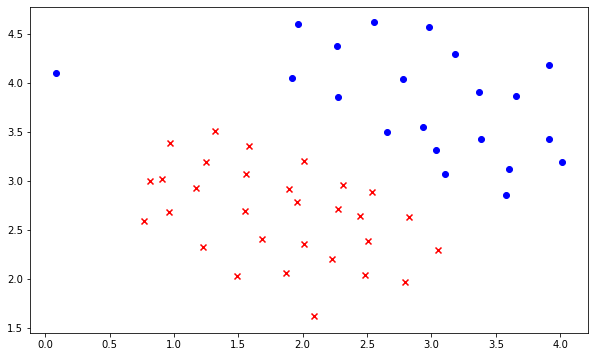

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
plot_data(features=X, labels=y, ax=ax)

In [39]:
C = 1
model = SVM(C=C)
model.svmTrain(X, y)

Pre-computing the kernel matrix
Training...
This may take 1 to 2 minutes
Elapsed time: 0.1436 seconds


In [40]:
from utils import plot_linear_decision_boundary

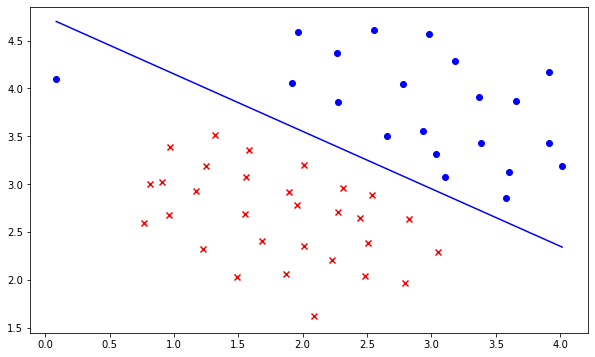

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
plot_linear_decision_boundary(X, y, model, ax)

In [42]:
data2 = loadmat("data/ex6data2.mat")
X = data2['X']
y = data2['y']
model = SVM()
model.svmTrain(X,y)

Pre-computing the kernel matrix
Training...
This may take 1 to 2 minutes
Elapsed time: 3.5690 seconds


In [43]:
def plot_decision_boundary(model, X, y, ax):
    plot_data(X, y, ax)
    x1plot = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    x2plot = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        x1 = np.reshape(X1[:,i], (-1, 1))
        x2 = np.reshape(X2[:,i], (-1, 1))
        this_X = np.hstack((x1, x2))
        vals[:, i] = model.svmPredict(this_X).flatten()
        
    ax.contour(X1, X2, vals, linewidths=2)

c:\users\kene\desktop\mlfromscratch\mls_env\lib\site-packages\ipykernel_launcher.py:13: UserWarning: No contour levels were found within the data range.
  del sys.path[0]


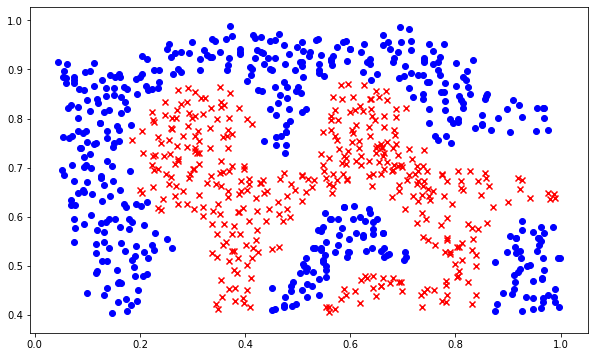

In [44]:
fig, ax = plt.subplots(figsize=(10,6))
plot_decision_boundary(model, X, y, ax)

In [45]:
data3 = loadmat("data/ex6data3.mat")
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [46]:
X = data3['X']
y = data3['y']
Xval = data3['Xval']
yval = data3['yval']

In [47]:
C, sigma = parameter_search(X, y, Xval, yval)

Pre-computing the kernel matrix
Training...
This may take 1 to 2 minutes
Elapsed time: 0.3726 seconds
Pre-computing the kernel matrix
Training...
This may take 1 to 2 minutes
Elapsed time: 0.0546 seconds
Pre-computing the kernel matrix
Training...
This may take 1 to 2 minutes


C:\Users\Kene\Desktop\MLFromScratch\SVM\svm.py:78: RuntimeWarning: divide by zero encountered in power
  K = np.power(self.kernel(1, 0, self.sigma), K)
C:\Users\Kene\Desktop\MLFromScratch\SVM\svm.py:101: RuntimeWarning: invalid value encountered in multiply
  E[i] = b + np.sum(alphas * Y * K[:, i].reshape(-1, 1)) - Y[i]
C:\Users\Kene\Desktop\MLFromScratch\SVM\svm.py:103: RuntimeWarning: invalid value encountered in less
  if (Y[i] * E[i] < -self.tol and alphas[i] < self.C) or (Y[i] * E[i] > self.tol and alphas[i] > 0):
C:\Users\Kene\Desktop\MLFromScratch\SVM\svm.py:103: RuntimeWarning: invalid value encountered in greater
  if (Y[i] * E[i] < -self.tol and alphas[i] < self.C) or (Y[i] * E[i] > self.tol and alphas[i] > 0):
C:\Users\Kene\Desktop\MLFromScratch\SVM\svm.py:109: RuntimeWarning: invalid value encountered in multiply
  E[j] = b + np.sum(alphas * Y * K[:, j].reshape(-1, 1)) - Y[j]
C:\Users\Kene\Desktop\MLFromScratch\SVM\svm.py:136: RuntimeWarning: invalid value encountered in le

Elapsed time: 0.4171 seconds
Pre-computing the kernel matrix
Training...
This may take 1 to 2 minutes
Elapsed time: 0.6369 seconds
Pre-computing the kernel matrix
Training...
This may take 1 to 2 minutes
Elapsed time: 0.6754 seconds
Pre-computing the kernel matrix
Training...
This may take 1 to 2 minutes
Elapsed time: 0.8915 seconds
Pre-computing the kernel matrix
Training...
This may take 1 to 2 minutes
Elapsed time: 0.6709 seconds
Pre-computing the kernel matrix
Training...
This may take 1 to 2 minutes
Elapsed time: 0.3658 seconds
Pre-computing the kernel matrix
Training...
This may take 1 to 2 minutes
Elapsed time: 0.5833 seconds
Pre-computing the kernel matrix
Training...
This may take 1 to 2 minutes
Elapsed time: 0.5680 seconds
Pre-computing the kernel matrix
Training...
This may take 1 to 2 minutes
Elapsed time: 0.5073 seconds
Pre-computing the kernel matrix
Training...
This may take 1 to 2 minutes
Elapsed time: 0.6563 seconds
Pre-computing the kernel matrix
Training...
This may 

In [48]:
C

0.01

In [49]:
sigma

0.03

In [50]:
model = SVM(kernel=gaussian_kernel, C=C, sigma=sigma)

In [51]:
model.svmTrain(X, y)

Pre-computing the kernel matrix
Training...
This may take 1 to 2 minutes
Elapsed time: 0.5391 seconds


In [52]:
p = model.svmPredict(Xval)

In [53]:
print(f"Training Accuracy: {np.mean(p==yval) *100}")

Training Accuracy: 81.5


In [54]:
print(f"Training Error: {np.mean(p!=yval) * 100}")

Training Error: 18.5
